In [1]:
# Library 
import chess
from chess import polyglot as poly

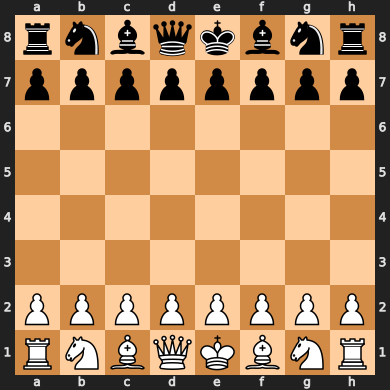

In [2]:
# Board
demo = chess.Board()
demo

In [3]:
import time

In [4]:
print(demo)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


In [5]:
MAX = 9999
MIN = -9999

In [6]:
# Value of piece position
pawntable = [
    0, 0, 0, 0, 0, 0, 0, 0,
    5, 10, 10, -20, -20, 10, 10, 5,
    5, -5, -10, 0, 0, -10, -5, 5,
    0, 5, 10, 20, 20, 10, 5, 0,
    5, 5, 10, 25, 25, 10, 5, 5,
    10, 10, 20, 30, 30, 20, 10, 10,
    50, 50, 50, 50, 50, 50, 50, 50,
    90, 90, 90, 90, 90, 90, 90, 90]

knightstable = [
    -50, -40, -30, -30, -30, -30, -40, -50,
    -40, -20, 0, 5, 5, 0, -20, -40,
    -30, 5, 10, 15, 15, 10, 5, -30,
    -30, 0, 15, 20, 20, 15, 0, -30,
    -30, 5, 15, 20, 20, 15, 5, -30,
    -30, 0, 10, 15, 15, 10, 0, -30,
    -40, -20, 0, 0, 0, 0, -20, -40,
    -50, -40, -30, -30, -30, -30, -40, -50]

bishopstable = [
    -20, -10, -10, -10, -10, -10, -10, -20,
    -10, 10, 0, 0, 0, 0, 10, -10,                  
    -15, 10, 10, 10, 10, 10, 10, -15,
    -10, 0, 10, 10, 10, 10, 0, -10,
    -10, 5, 5, 10, 10, 5, 5, -10,
    -10, 0, 5, 10, 10, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -10, -10, -10, -10, -20]   # 5 ,5, -10, -10

rookstable = [
    0, 0, 0, 5, 5, 0, 0, 0,
    -5, 0, 0, 0, 0, 0, 0, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5,5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    -5, 5, 5, 5, 5, 5, 5, -5,
    5, 10, 10, 10, 10, 10, 10, 5,
    5, 5, 0, 0, 0, 0, 5, 5]

queenstable = [
    -20, -10, -10, -5, -5, -10, -10, -20,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -10, 5, 5, 5, 5, 5, 0, -10,
    0, 0, 5, 5, 5, 5, 0, -5,
    -5, 0, 5, 5, 5, 5, 0, -5,
    -10, 0, 5, 5, 5, 5, 0, -10,
    -10, 0, 0, 0, 0, 0, 0, -10,
    -20, -10, -10, -5, -5, -10, -10, -20]

kingstable = [
    20, 30, 10, 0, 0, 10, 30, 20,
    20, 20, 0, 0, 0, 0, 20, 20,
    -10, -20, -20, -20, -20, -20, -20, -10,
    -20, -30, -30, -40, -40, -30, -30, -20,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30,
    -30, -40, -40, -50, -50, -40, -40, -30]

In [7]:
def material_point(board):
    # Pawn difference = # of white pawns - # of black pawns
    pawn_diff = len(board.pieces(chess.PAWN, chess.WHITE)) - len(board.pieces(chess.PAWN, chess.BLACK))
    # Knight difference = # of white knight - # of black knight
    knight_diff = len(board.pieces(chess.KNIGHT, chess.WHITE)) - len(board.pieces(chess.KNIGHT, chess.BLACK))
    # Bishop difference = # of white bishop - # of black bishop
    bishop_diff = len(board.pieces(chess.BISHOP, chess.WHITE)) - len(board.pieces(chess.BISHOP, chess.BLACK))
    # Rook difference = # of white rook - # of black rook
    rook_diff = len(board.pieces(chess.ROOK, chess.WHITE)) - len(board.pieces(chess.ROOK, chess.BLACK))
    # Queen difference = # of white queen - # of black queen
    queen_diff = len(board.pieces(chess.QUEEN, chess.WHITE)) - len(board.pieces(chess.QUEEN, chess.BLACK))
    return 100*pawn_diff + 320*knight_diff + 330*bishop_diff + 500*rook_diff + 900*queen_diff

In [8]:
def position_point(board):
    # pawn_pos = pawn_white_point + pawn_black_point
    pawn_pos = sum([pawntable[i] for i in board.pieces(chess.PAWN, chess.WHITE)]) + sum([-pawntable[chess.square_mirror(i)] for i in board.pieces(chess.PAWN, chess.BLACK)])
    # knight_pos = knight_white_point + knight_black_point
    knight_pos = sum([knightstable[i] for i in board.pieces(chess.KNIGHT, chess.WHITE)]) + sum([-knightstable[chess.square_mirror(i)] for i in board.pieces(chess.KNIGHT, chess.BLACK)])
    # bishop_pos = bishop_white_point + bishop_black_point
    bishop_pos = sum([bishopstable[i] for i in board.pieces(chess.BISHOP, chess.WHITE)]) + sum([-bishopstable[chess.square_mirror(i)] for i in board.pieces(chess.BISHOP, chess.BLACK)])
    # rook_pos = rook_white_point + rook_black_point
    rook_pos = sum([rookstable[i] for i in board.pieces(chess.ROOK, chess.WHITE)]) + sum([-rookstable[chess.square_mirror(i)] for i in board.pieces(chess.ROOK, chess.BLACK)])
    # queen_pos = queen_white_point + queen_black_point
    queen_pos = sum([queenstable[i] for i in board.pieces(chess.QUEEN, chess.WHITE)]) + sum([-queenstable[chess.square_mirror(i)] for i in board.pieces(chess.QUEEN, chess.BLACK)])
    # king_pos = king_white_point + king_black_point
    king_pos = sum([kingstable[i] for i in board.pieces(chess.KING, chess.WHITE)]) + sum([-kingstable[chess.square_mirror(i)] for i in board.pieces(chess.KING, chess.BLACK)])
    return pawn_pos + knight_pos + bishop_pos + rook_pos + queen_pos + king_pos


In [9]:
def evaluatePoint(board):
    evaluate_point = material_point(board) + position_point(board)
    return evaluate_point

In [10]:
def minMax(board, depth, isMax):
    if board.is_checkmate():
        if isMax: # Next turn is trắng
            return MIN
        else:
            return MAX
    if board.is_stalemate(): # Some how king of white or black can not move
        return 0
    if board.is_insufficient_material(): # Game is over
        return 0
    
    if depth == 0:
        return evaluatePoint(board)
    
    if isMax:
        bestScore = MIN
        for move in board.legal_moves:
            board.push(move)
            score = minMax(board, depth - 1, False)
            board.pop()
            if score > bestScore:
                bestScore = score
        return bestScore
    else:
        bestScore = MAX
        for move in board.legal_moves:
            board.push(move)
            score = minMax(board, depth - 1, True)
            board.pop()
            if score < bestScore:
                bestScore = score 
        return bestScore

In [11]:
def alphaBeta(board, depth, alpha, beta, isMax):
    if board.is_checkmate():
        if isMax: # Next turn is trắng
            return -10000
        else:
            return 10000
        
    if board.is_stalemate(): # Some how king of white or black can not move
        return 0
    
    if board.is_insufficient_material(): # Game is over
        return 0
    
    if depth == 0:
        return evaluatePoint(board)
            

    if isMax:
        bestScore = MIN
        for move in board.legal_moves:
            board.push(move)
            score = alphaBeta(board, depth - 1, alpha, beta, False)
            board.pop()

            if alpha < score:
                alpha = score

            if bestScore < score:
                bestScore = score
                
            if alpha >= beta:
                break
        return bestScore
            
    else:
        bestScore = MAX
        for move in board.legal_moves:
            board.push(move)
            score = alphaBeta(board, depth - 1, alpha, beta, True)
            board.pop()

            if beta >= score:
                beta = score

            if bestScore > score:
                bestScore = score

            if alpha >= beta:
                break
        return bestScore

In [12]:
def findBestMove(board, depth, isMax):
    if board.is_checkmate():
        return chess.Move.null()
        
    start = time.time()
    try:
        move = chess.polyglot.MemoryMappedReader("human.bin").weighted_choice(board).move
        end = time.time()
        print("Time: {} s".format(end - start))
        return move
    except:
        bestMove = chess.Move.null()
        if isMax:
            bestScore = MIN
            for move in board.legal_moves:
                board.push(move)
                score = minMax(board, depth - 1, False)
                board.pop()
                if score > bestScore:
                    bestScore = score
                    bestMove = move
            end = time.time()
            print("Time: {} s".format(end - start))
            return bestMove
        else:
            bestScore = MAX
            for move in board.legal_moves:
                board.push(move)
                score = minMax(board, depth - 1, True)
                board.pop()
                if score < bestScore:
                    bestScore = score
                    bestMove = move
            end = time.time()
            print("Time: {} s".format(end - start))
            return bestMove

In [13]:
def findBestMove_v2(board, depth, isMax):
    if board.is_checkmate():
        return chess.Move.null()
        
    start = time.time()
    try:
        move = chess.polyglot.MemoryMappedReader("human.bin").weighted_choice(board).move
        end = time.time()
        print("Time: {} s".format(end - start))
        return move
    except:
        bestMove = chess.Move.null()
        alpha = -10000
        beta = 10000
        if isMax:
            bestScore = MIN
            for move in board.legal_moves:
                board.push(move)
                score = alphaBeta(board, depth - 1, alpha, beta, False)
                board.pop()
                if score > bestScore:
                    bestScore = score
                    bestMove = move
                if score > alpha:
                    alpha = score
                if alpha >= beta:
                    break
            end = time.time()
            print("Time: {} s".format(end - start))
            return bestMove
        else:
            bestScore = MAX
            for move in board.legal_moves:
                board.push(move)
                score = alphaBeta(board, depth - 1, alpha, beta, True)
                board.pop()
                if score < bestScore:
                    bestScore = score
                    bestMove = move
                if beta >= score:
                    beta = score
                if alpha >= beta:
                    break
            end = time.time()
            print("Time: {} s".format(end - start))
            return bestMove

In [ ]:
# main function for the Monte Carlo Tree Search
def monte_carlo_tree_search(root):
    while resources_left(time, computational power):
        leaf = traverse(root)
        simulation_result = rollout(leaf)
        backpropagate(leaf, simulation_result)
    return best_child(root)

# function for node traversal
def traverse(node):
    while fully_expanded(node):
        node = best_uct(node)
	# in case no children are present / node is terminal
	return pick_univisted(node.children) or node

# function for the result of the simulation
def rollout(node):
	while non_terminal(node):
		node = rollout_policy(node)
	return result(node)

# function for randomly selecting a child node
def rollout_policy(node):
	return pick_random(node.children)

# function for backpropagation
def backpropagate(node, result):
	if is_root(node) return
	node.stats = update_stats(node, result)
	backpropagate(node.parent)

# function for selecting the best child
# node with highest number of visits
def best_child(node):
	pick child with highest number of visits


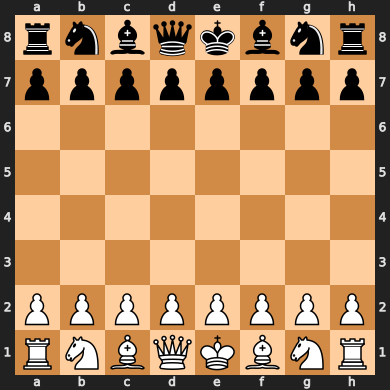

In [14]:
test = chess.Board()
test

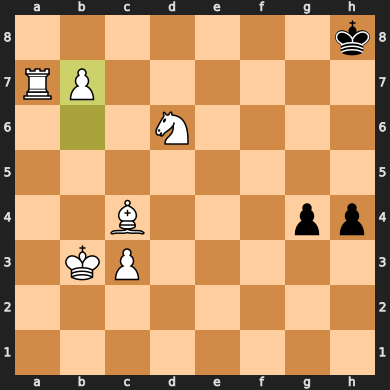

In [113]:
# Human play
test.push_san("b7")
test

Time: 1.4220380783081055 s


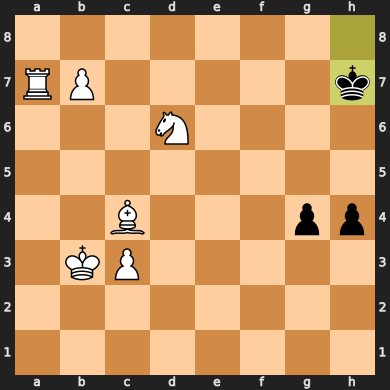

In [114]:
# AI play 
move = findBestMove_v2(test, 5, False)
if move == chess.Move.null():
    print("I lose :<")
test.push(move)
test

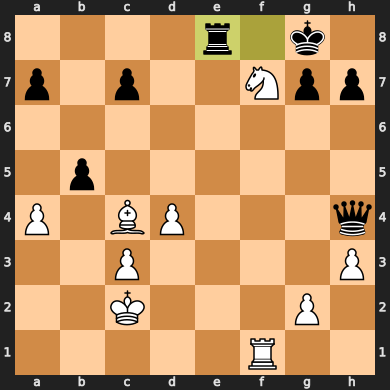

In [69]:
test

In [67]:
test.turn

False

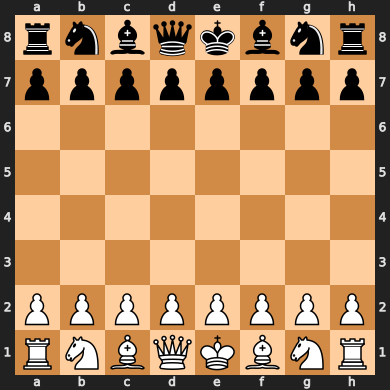

In [19]:
demo = test
demo

In [20]:
demo.push_san("e6")
demo

ValueError: illegal san: 'e6' in rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1

In [21]:
test.pop()
test.pop()

IndexError: pop from empty list

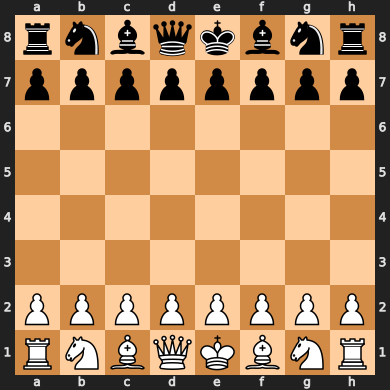

In [22]:
test

In [23]:
import chess.svg
import chess.pgn
import chess.engine
from IPython.display import SVG
count = 0
movehistory = []
game = chess.pgn.Game()
board = chess.Board()
while not board.is_game_over(claim_draw=True):
    if board.turn:
        count += 1
        print(f'\n{count}]\n')
        move = findBestMove(board, 3, True)
        board.push(move)
        print(board)
        print()
    else:
        move = findBestMove(board, 3, False)
        board.push(move)
        print(board)
game.add_line(movehistory)
game.headers["Event"] = "Self Tournament 2021"
game.headers["Site"] = "Pune"
#game.headers["Date"] = str(datetime.datetime.now().date())
game.headers["Round"] = 1
game.headers["White"] = "Ai"
game.headers["Black"] = "Ai"
game.headers["Result"] = str(board.result(claim_draw=True))
print(game)
SVG(chess.svg.board(board=board,size=400))


1]

Time: 0.0 s
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R

Time: 0.00661778450012207 s
r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R

2]

Time: 0.0 s
r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R

Time: 0.009651422500610352 s
r n b q k b . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. . P P . . . .
. . . . . . . .
P P . . P P P P
R N B Q K B N R

3]

Time: 0.0 s
r n b q k b . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. . P P . . . .
. . N . . . . .
P P . . P P P P
R . B Q K B N R

Time: 0.0 s
r n b q k . . r
p p p p . p p p
. . . . p n . .
. . . . . . . .
. b P P . . . .
. . N . . . . .
P P . . P P P P
R . B Q K B N R

4]

Time: 0.009974479675292969 s
r n b q k . . r
p p p p . p p p
. . . . p n . .
. . . . . . B .
. b P P . .

KeyboardInterrupt: 

In [24]:
engine = chess.engine.SimpleEngine.popen_uci(r"C:/Users/Admin/Desktop/My Hust/School/3rd/Artificial Intelligent/Capstone Project/Chess game/stockfish_14_win_x64_avx2/stockfish_14_x64_avx2.exe")

In [25]:
import chess.svg
import chess.pgn
import chess.engine as en

In [26]:
engine = en.SimpleEngine.popen_uci(r"C:/Users/Admin/Desktop/My Hust/School/3rd/Artificial Intelligent/Capstone Project/Chess game/stockfish_14_win_x64_avx2/stockfish_14_x64_avx2.exe")

In [27]:
# My AI vs Stockfish 12
aiChess = chess.Board()
count = 0

Time: 0.0 s


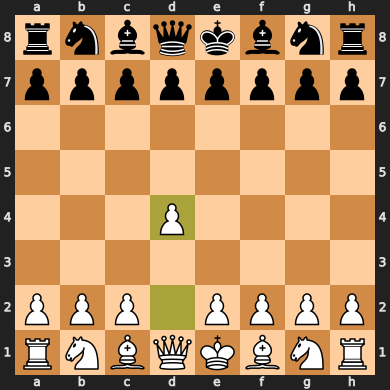

In [28]:
move = findBestMove_v2(aiChess, 5, False)
if move == chess.Move.null():
    print("I lose :<")
aiChess.push(move)
count += 1
aiChess

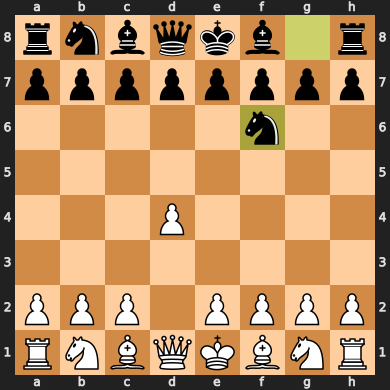

In [29]:
move = engine.play(aiChess, en.Limit(time=0.1))
aiChess.push(move.move)
aiChess

In [30]:
aiChess.pop()

Move.from_uci('g8f6')

In [31]:
aiChess.turn

False

In [33]:
# Remaining imports
import traceback
from flask import Flask, Response, request
import webbrowser
# Searching Ai's Move
def aimove():
    move = findBestMove_v2(board, 5, False)
    board.push(move)
# Searching Stockfish's Move
def stockfish():
    engine = chess.engine.SimpleEngine.popen_uci(
        "your_path/stockfish.exe")
    move = engine.play(board, chess.engine.Limit(time=0.1))
    board.push(move.move)
app = Flask(__name__)
# Front Page of the Flask Web Page
@app.route("/")
def main():
    global count, board
    ret = '<html><head>'
    ret += '<style>input {font-size: 20px; } button { font-size: 20px; }</style>'
    ret += '</head><body>'
    ret += '<img width=510 height=510 src="/board.svg?%f"></img></br></br>' % time.time()
    ret += '<form action="/game/" method="post"><button name="New Game" type="submit">New Game</button></form>'
    ret += '<form action="/undo/" method="post"><button name="Undo" type="submit">Undo Last Move</button></form>'
    ret += '<form action="/move/"><input type="submit" value="Make Human Move:"><input name="move" type="text"></input></form>'
    ret += '<form action="/dev/" method="post"><button name="Comp Move" type="submit">Make Ai Move</button></form>'
    ret += '<form action="/engine/" method="post"><button name="Stockfish Move" type="submit">Make Stockfish Move</button></form>'
    return ret
# Display Board
@app.route("/board.svg/")
def board():
    return Response(chess.svg.board(board=board, size=700), mimetype='image/svg+xml')
# Human Move
@app.route("/move/")
def move():
    try:
        move = request.args.get('move', default="")
        board.push_san(move)
    except Exception:
        traceback.print_exc()
    return main()
# Make Ai’s Move
@app.route("/dev/", methods=['POST'])
def dev():
    try:
        aimove()
    except Exception:
        traceback.print_exc()
    return main()
# Make UCI Compatible engine's move
@app.route("/engine/", methods=['POST'])
def engine():
    try:
        stockfish()
    except Exception:
        traceback.print_exc()
    return main()
# New Game
@app.route("/game/", methods=['POST'])
def game():
    board.reset()
    return main()
# Undo
@app.route("/undo/", methods=['POST'])
def undo():
    try:
        board.pop()
    except Exception:
        traceback.print_exc()
    return main()

ModuleNotFoundError: No module named 'flask'